In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Google N-Grams Problem
In a widely discussed paper, Michel and colleagues (2011) analyzed the content of more than five million digitized books in an attempt to identify long-term cultural trends. The data that they used has now been released as the Google NGrams dataset, and so we can use the data to replicate and extend some of their work.

In one of the many results in the paper, Michel and colleagues argued that we are forgetting faster and faster. For a particular year, say “1883,” they calculated the proportion of 1-grams published in each year between 1875 and 1975 that were “1883”. They reasoned that this proportion is a measure of the interest in events that happened in that year. In their figure 3a, they plotted the usage trajectories for three years: 1883, 1910, and 1950. These three years share a common pattern: little use before that year, then a spike, then decay. Next, to quantify the rate of decay for each year, Michel and colleagues calculated the “half-life” of each year for all years between 1875 and 1975. In their figure 3a (inset), they showed that the half-life of each year is decreasing, and they argued that this means that we are forgetting the past faster and faster. They used Version 1 of the English language corpus, but subsequently Google has released a second version of the corpus. Please read all the parts of the question before you begin coding.

This activity will give you practice writing reusable code, interpreting results, and data wrangling (such as working with awkward files and handling missing data). This activity will also help you get up and running with a rich and interesting dataset.

a. Get the raw data from the Google Books NGram Viewer website. In particular, you should use version 2 of the English language corpus, which was released on July 1, 2012. Uncompressed, this file is 1.4GB.

b. Recreate the main part of figure 3a of Michel et al. (2011). To recreate this figure, you will need two files: the one you downloaded in part (a) and the “total counts” file, which you can use to convert the raw counts into proportions. Note that the total counts file has a structure that may make it a bit hard to read in. Does version 2 of the NGram data produce similar results to those presented in Michel et al. (2011), which are based on version 1 data?

c. Now check your graph against the graph created by the NGram Viewer.

d. Recreate figure 3a (main figure), but change the y -axis to be the raw mention count (not the rate of mentions).

e. Does the difference between (b) and (d) lead you to reevaluate any of the results of Michel et al. (2011). Why or why not?

f. Now, using the proportion of mentions, replicate the inset of figure 3a. That is, for each year between 1875 and 1975, calculate the half-life of that year. The half-life is defined to be the number of years that pass before the proportion of mentions reaches half its peak value. Note that Michel et al. (2011) do something more complicated to estimate the half-life—see section III.6 of the Supporting Online Information—but they claim that both approaches produce similar results. Does version 2 of the NGram data produce similar results to those presented in Michel et al. (2011), which are based on version 1 data? (Hint: Don’t be surprised if it doesn’t.)

g. Were there any years that were outliers such as years that were forgotten particularly quickly or particularly slowly? Briefly speculate about possible reasons for that pattern and explain how you identified the outliers.

h. Now replicate this result for version 2 of the NGrams data in Chinese, French, German, Hebrew, Italian, Russian and Spanish.

i. Comparing across all languages, were there any years that were outliers, such as years that were forgotten particularly quickly or particularly slowly? Briefly speculate about possible reasons for that pattern.

Data was retrieved as mentioned above. I got the description of the column names from Wikipedia: https://en.wikipedia.org/wiki/Google_Ngram_Viewer.

## a. Getting the data

In [3]:
ngrams = pd.read_table("./data/ngrams_1/googlebooks-eng-all-1gram-20120701-1", 
                   parse_dates=True, header=None, 
                   names=["ngram","year","match_count","volume_count"])
ngrams.head(3)

,ngram,year,match_count,volume_count
0,1'23,1799,1,1
1,1'23,1804,1,1
2,1'23,1805,1,1


We will only be working now with data about three N-grams. Hence it's wise to first filter the dataset to only the relevant ones. Let's subset the data only to those where the Ngrams are our desired ones: 1883, 1910, 1950.

In [4]:
df_years_ngrams = ngrams.loc[ngrams['ngram'].isin(['1883','1910','1950'])]
df_years_ngrams.sample(6)

,ngram,year,match_count,volume_count
27829578,1883,1524,15,1
27829705,1883,1880,1168,277
71862116,1950,1940,3723,786
47107703,1910,1824,25,25
71862104,1950,1928,1163,462
71862162,1950,1986,195456,26663


## b. Plot figure like 3a: Frequency of the N-grams "1883", "1910", "1950"

To get the total counts, I needed to download the file seperately. It's a text file, where the lines where seperated by tabs and columns by commas. I replaced all tabs to line-breaks when exmining the file on Sublime Text, then it could be naturally read as a table with a separator of a comma. 
I lacks the column names, but I found their meaning here: http://stanford.edu/~risi/tutorials/absolute_ngram_counts.html`

In [7]:
total_counts = pd.read_table("./data/ngrams_total_counts/googlebooks-eng-all-totalcounts-20120701.txt", 
                             sep=',', parse_dates=True, header=None, 
                             names=["year","total_words","pages","books"])
total_counts.head(3)

,year,total_words,pages,books
0,1505,32059,231,1
1,1507,49586,477,1
2,1515,289011,2197,1


Now we can merge both dataframes to have both counts of ngrams and of total words to then generate percentages.

In [8]:
df = df_years_ngrams.merge(total_counts, how='inner', on='year')
df.head(3)

,ngram,year,match_count,volume_count,total_words,pages,books
0,1883,1515,1,1,289011,2197,1
1,1950,1515,6,1,289011,2197,1
2,1883,1520,1,1,51783,223,1


In [9]:
# calculate percentage / frequency:
df['freq'] = df.match_count/df.total_words
df = df.sort_values(by=['ngram','year'])
df.head(5)

,ngram,year,match_count,volume_count,total_words,pages,books,freq
0,1883,1515,1,1,289011,2197,1,0.000003
2,1883,1520,1,1,51783,223,1,0.000019
3,1883,1524,15,1,287177,1275,1,0.000052
5,1883,1574,4,1,62235,689,1,0.000064
6,1883,1575,3,1,186706,1067,1,0.000016


In [10]:
# save this filtered (and sorted) data
df.to_csv("./data/google-ngrams-filtered-3years.csv")

### Plotting figure like 3a

In [11]:
df.ngram = pd.to_numeric(df.ngram)

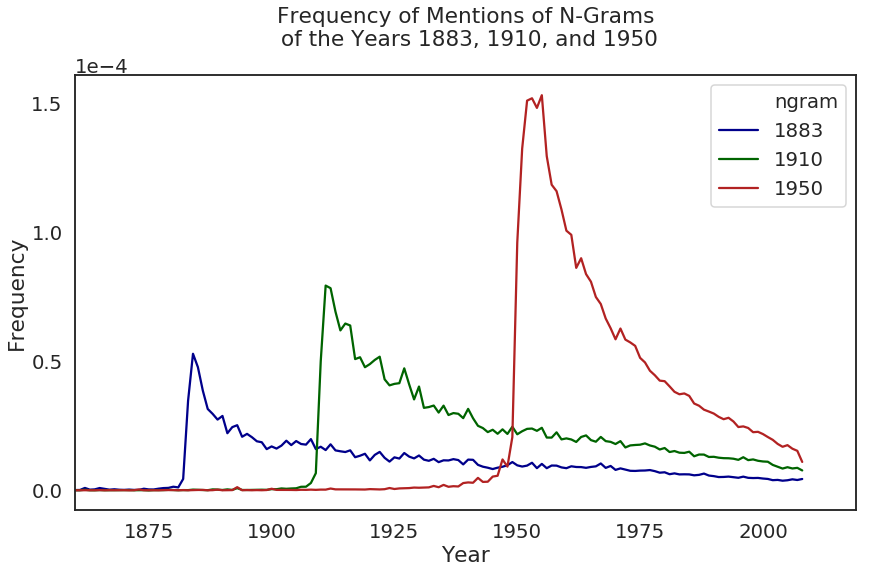

In [12]:
sns.set(style='white', context="talk", font_scale=1.2, rc={'figure.figsize':(14,8)})
custom_palette ={1883:"darkblue",1910:"darkgreen",1950:"firebrick"}
ax = sns.lineplot(x="year", y="freq", hue="ngram",
                   data=df, palette=custom_palette)
ax.set(title="Frequency of Mentions of N-Grams\n of the Years 1883, 1910, and 1950\n", xlim=(1860,2019),ylabel="Frequency",xlabel="Year")
ax.set_yticks([0, 0.00005, 0.0001, 0.00015])
ax.set_xticks(np.arange(1875,2001,25))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

### Does version 2 of the NGram data produce similar results to those presented in Michel et al. (2011), which are based on version 1 data?
Below is the figure mentioned in Michel (2010):

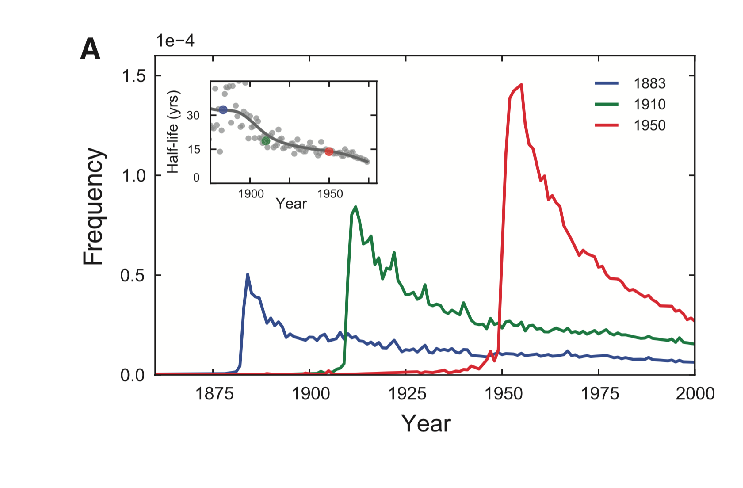

In [13]:
image = mpimg.imread("./viz/Michel2010_3a.png")
plt.imshow(image)
plt.axis('off')
plt.show()

These plots show very similar patterns. They both show a slight increasing trend twards that year, a huge peak at that year, and a somewhat exponential decay after that year, at a potnetially increasing rate. It may be that the updated data even has a steeper decay rate, but that might be also just a visual illusion. There are other tiny detectable differences such as a small dip in the red peak in our replication that is not found in Michel's (2010) plot; and slightly different noise patterns of the data, which might result from the smoothing effects done on the Google data, but the big picture seems the same.

## c. Comparing the Google N-grams Online Viewer

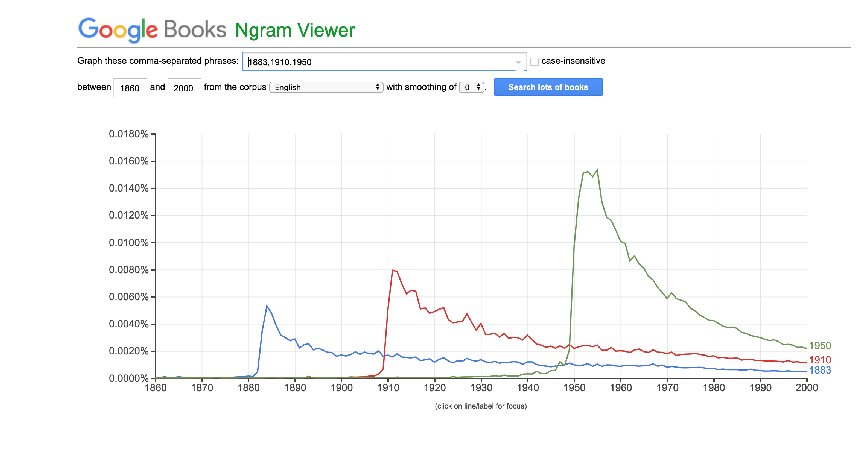

In [14]:
image = mpimg.imread("./viz/Google_NGrams.png")
plt.imshow(image)
plt.axis('off')
plt.show()

Checking my graph against the graph created by the NGram Viewer, also seams to have very similar patterns, also reaching similar peak values. I don't detect other major differences (other than the color coding). 

## d. Recreate figure 3a (main figure), but change the y-axis to be the raw mention count (not the rate of mentions).

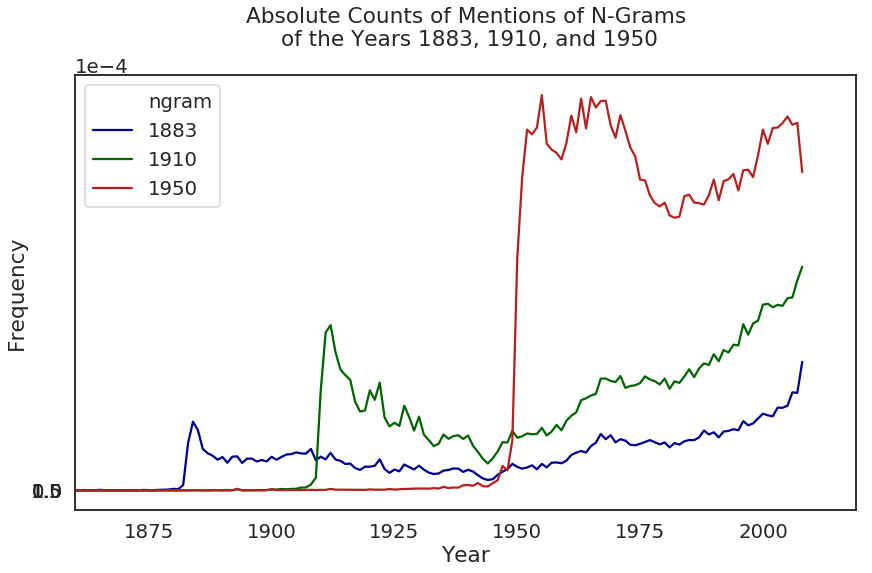

In [157]:
sns.set(style='white', context="talk", font_scale=1.2, rc={'figure.figsize':(14,8)})
custom_palette ={1883:"darkblue",1910:"darkgreen",1950:"firebrick"}
ax = sns.lineplot(x="year", y="match_count", hue="ngram",
                   data=df, palette=custom_palette)
ax.set(title="Absolute Counts of Mentions of N-Grams\n of the Years 1883, 1910, and 1950\n", xlim=(1860,2019),ylabel="Frequency",xlabel="Year")
ax.set_yticks([0, 0.00005, 0.0001, 0.00015])
ax.set_xticks(np.arange(1875,2001,25))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

### e. Does the difference between (b) and (d) lead you to reevaluate any of the results of Michel et al. (2011). Why or why not?

Yes. While the paper claims that we are "forgetting" faster and faster (by the proportion of mentions of specific years, if you look at absolute counts you see that actually after a peak in that year, there is only a smaller drop and then there is actually an increase of mentions of that year, mostly to a similar level and sometimes to a larger number than the original peak at that year. Thus, you could claim that we don't forget, but we rather remember and increase our awareness and mentions of those years. What the frequency data describes in that case would be because of increasing amounts of total mentions and writings each year; but not because we "forget"; we just have more other things we talk about each year, while still talking mostly the same amount or more about these past issues.

### f. Now, using the proportion of mentions, replicate the inset of figure 3a. That is, for each year between 1875 and 1975, calculate the half-life of that year. 
The half-life is defined to be the number of years that pass before the proportion of mentions reaches half its peak value. Note that Michel et al. (2011) do something more complicated to estimate the half-life—see section III.6 of the Supporting Online Information—but they claim that both approaches produce similar results. Does version 2 of the NGram data produce similar results to those presented in Michel et al. (2011), which are based on version 1 data? (Hint: Don’t be surprised if it doesn’t.)

In [215]:
# first, now we need to actually merge the WHOLE dataset for these years
# filter the dataset: only after 1860, and only for terms between 1875 and 1975
ngrams_recent = ngrams[ngrams.year >= 1860]
years_of_interest = [str(num) for num in range(1875,1976)] # make a list of terms to filter (as strings)
df_allyears_ngrams = ngrams_recent.loc[ngrams_recent['ngram'].isin(years_of_interest)] 
# merge the relevant ngrams dataset with the total counts
df_all = df_allyears_ngrams.merge(total_counts, how='inner', on='year')
# add frequency
df_all['freq'] = df_all.match_count/df_all.total_words 
# convert to numberic and sort database
df_all.ngram = pd.to_numeric(df_all.ngram)
df_all = df_all.sort_values(by=['ngram','year'])
df_all.describe()

,ngram,year,match_count,volume_count,total_words,pages,books,freq
count,15049.000000,15049.000000,1.504900e+04,15049.000000,1.504900e+04,1.504900e+04,15049.000000,1.504900e+04
mean,1925.000000,1934.000000,6.067193e+04,7281.491926,3.004419e+09,1.560671e+07,29335.785235,1.746380e-05
std,29.155728,43.013055,1.130503e+05,10108.468419,3.621293e+09,1.826940e+07,35141.535100,2.852250e-05
min,1875.000000,1860.000000,8.000000e+00,7.000000,3.968395e+08,2.162284e+06,3364.000000,1.242480e-08
25%,1900.000000,1897.000000,2.350000e+02,107.000000,9.301969e+08,5.204954e+06,9221.000000,2.336053e-07
50%,1925.000000,1934.000000,2.054900e+04,3425.000000,1.324895e+09,7.719563e+06,13309.000000,8.643934e-06
75%,1950.000000,1971.000000,7.235000e+04,10536.000000,4.058577e+09,2.093429e+07,42050.000000,2.116383e-05
max,1975.000000,2008.000000,1.110751e+06,60347.000000,1.948294e+10,1.088110e+08,206272.000000,2.503626e-04


In [360]:
# I'll define a function which finds the halflife of a term in the dataset

def find_halflife(df_all, term=1883):
    ''' 
    takes as input a term in the Google-Ngram database subset
    and calculates its halflife (in our case, a name of a year).
    The half-life is defined to be the number of years that pass 
    before the proportion of mentions reaches half its peak value.
    '''
    # make dataset groups per year:
    group = df_all.loc[df_all.ngram == term] # subset the dataset to the group
    group = group.sort_values(by='year') # make sure group is sorted correctly

    # find the row with the peak value and its year
    row_max = group.loc[group['freq'].idxmax(),]

    # find the first row with value of a half or less, after the first year
    row_half = group[(group.year > row_max.year) & (group.freq <= (row_max.freq/2.0))].iloc[0]
    # return the number of years passed between these two
    ## rows_df = pd.DataFrame(row_max).transpose().append(row_half.transpose()) # for debugging
    return(row_half.year - row_max.year)

find_halflife(df_all, 1900)

19.0

In [227]:
# use this function to find the halflife value for all years between 1875 and 1975
halflifes = []
year_of_hl = []
for term in range(1875,1976):
    halflife_val = find_halflife(df_all, term)
    halflifes.append(halflife_val)
    year_of_hl.append(term)
halflifes[0:10] # peak at the halflives

[7.0, 6.0, 4.0, 4.0, 9.0, 10.0, 5.0, 7.0, 7.0, 6.0]

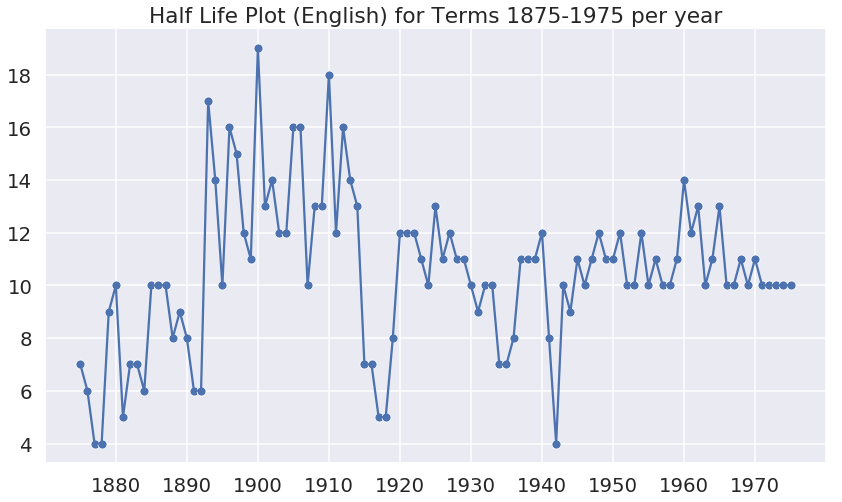

In [258]:
sns.set(style='darkgrid', context="talk", font_scale=1.2, rc={'figure.figsize':(14,8)})
ax =  sns.scatterplot(year_of_hl, halflifes)
ax.set_xticks(np.arange(1880,1980,10))
sns.lineplot(year_of_hl, halflifes)
sns.regplot(year_of_hl, halflifes)
ax.set_title('Half Life Plot (English) for Terms 1875-1975 per year')
plt.show()

Does version 2 of the NGram data does not produce similar results to those presented in Michel et al. (2011), which are based on version 1 data. There doesn't seem to be the same decreasing trend as shown at his, but the updated data seems to have a constant (or even an increasing trend if you start from 1880). 

### g. Were there any years that were outliers such as years that were forgotten particularly quickly or particularly slowly? Briefly speculate about possible reasons for that pattern and explain how you identified the outliers.



At first glance, I can visually see that low outliers were 1942, somewhat 1917-1918, and all the years below below 1903 excluding 1900. 
The early years make sense to have lower values if our assumption is that with time there is more information, more books, and therefore we have more and more mentions of that year. However if we consider half life by the frequency than this still depends on the proportion relative to others.
I would assume that maybe developments in World War II were more prominent in other years than popular.
High outliers seem to be the group of years 1893-1910, but in particular the year 1900 (which is the highest). That makes sense since its the round year starting the century, so many mentions which generalize to the 19th/20th centuries might say "Since 1900" or "Until 1900". 

A potentially more precise way to detect outliers would be to fit a regression line and confidence intervals, and see which observations are farthest from it. I will do a brief example of that technique here, although not optimizing the regression line to fit the nonlinear nature of the data.

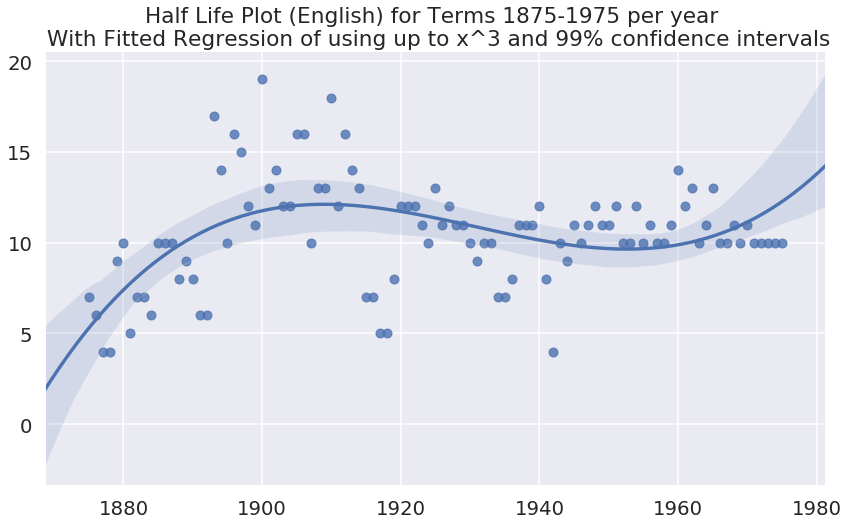

In [252]:
ax = sns.regplot(x=year_of_hl, y=halflifes, order=3, ci=99).set_title("Half Life Plot (English) for Terms 1875-1975 per year \n With Fitted Regression of using up to x^3 and 99% confidence intervals")

I fitted as an example a regression line with the order of 3 since it looked like there should be ~3 sections of the data (before 1883, 1883-1914, 1915 onwards) so we'd need 2 inflection points at least. 
This seems to produce similar answers to what I've mentioned before. 

### h. Now replicate this result for version 2 of the NGrams data in Chinese, French, German, Hebrew, Italian, Russian and Spanish.

Now I'll create functions to generate this from the datasets. 

In [ ]:
# make a list of terms to filter (as strings)
years_of_interest = [str(num) for num in range(1875,1976)] 

In [366]:
def make_ngrams_df(lang):
    '''
    This functions makes the needed dataframe for the relevant Ngrams of the desired language.
    Inputs: 
        lang: short language code, to fetch the relevant files
    Outputs:
        df: the dataframe merged with total counts to get frequencies, filtered and sorted
    '''
    # fetch the dataset from disk according to language name
    all_ngrams_lng = pd.read_table("./data/ngrams_1/googlebooks-{}-all-1gram-20120701-1".format(lang), 
                       parse_dates=True, header=None, 
                       names=["ngram","year","match_count","volume_count"])

    total_counts_lng = pd.read_table("./data/ngrams_total_counts/googlebooks-{}-all-totalcounts-20120701.txt".format(lang), 
                                 sep=',', parse_dates=True, header=None, 
                                 names=["year","total_words","pages","books"])
    
    # first, now we need to actually merge the WHOLE dataset for these years
    # filter the dataset: only after 1860, and only for terms between 1875 and 1975
    df_lng = all_ngrams_lng[all_ngrams_lng.year >= 1860]
    df_lng = df_lng.loc[df_lng['ngram'].isin(years_of_interest)] 
    df_lng.year = pd.to_numeric(df_lng.year)
    total_counts_lng.year = pd.to_numeric(total_counts_lng.year)
    # merge the relevant ngrams dataset with the total counts
    df_lng = df_lng.merge(total_counts_lng, how='inner', on='year')
    # add frequency
    df_lng['freq'] = df_lng.match_count/df_lng.total_words 
    # convert to numberic and sort database
    df_lng.ngram = pd.to_numeric(df_lng.ngram)
    df_lng = df_lng.sort_values(by=['ngram','year'])
    return df_lng


def find_halflives_many(df_lng, terms_list):
    '''
    This function finds the halflife of many terms according to the inserted list of terms
    And outputs the list of halflifes along with the terms used
    '''
    # find the halflife value for all years between 1875 and 1975
    halflifes = []
    terms_used = []
    for term in terms_list:
        halflife_val = find_halflife(df_lng, term)
        halflifes.append(halflife_val)
        terms_used.append(term)
    return (halflifes, terms_used)


def data_to_halflife_plot(lang="eng", lang_prettyname="English", terms_list=range(1875,1976)):
    '''
    This wrapper function takes as literal inputs the language requested and returns the halflife plot of this language.
    lang: Language Code (Short name) found in the files. The data files are organized at the same folder 
            and have the same name except for the language code / short name. (String)
    lang_prettyname: Full name of the language, for the plot's title. (String)
    
    Taking those languages, the function loads the corresponding datasets from the specified locations 
    (files must be downloaded and organized in these folders, or retrieval lines must change accordingly),
    then the function filters the data to the relevant years and Ngrams of interest, merges with total counts,
    calculates frequencies, calculates the halflife (using the previously defined function), 
    and outputs the desired half life plot from term frequencies of that language.
    '''
    # first, fetch data from disk and make df, as in function above
    df_lng = make_ngrams_df(lang)
    
    # find the halflives in that df_lng of those terms (define terms above if other than 1875-1975)
    halflifes, terms_used = find_halflives_many(df_lng, terms_list)
    
    # Plot the half life plot
    sns.set(style='darkgrid', context="talk", font_scale=1.2, rc={'figure.figsize':(14,8)})
    ax = sns.regplot(x=terms_used, y=halflifes, order=1, ci=95)
    ax.set_xticks(np.arange(1880,1980,10))
    ax.set_title("{}: Half Life Plot for Terms 1875-1975 \n With Linear Regression and 95% confidence intervals".format(lang_prettyname))
    return(plt.show())

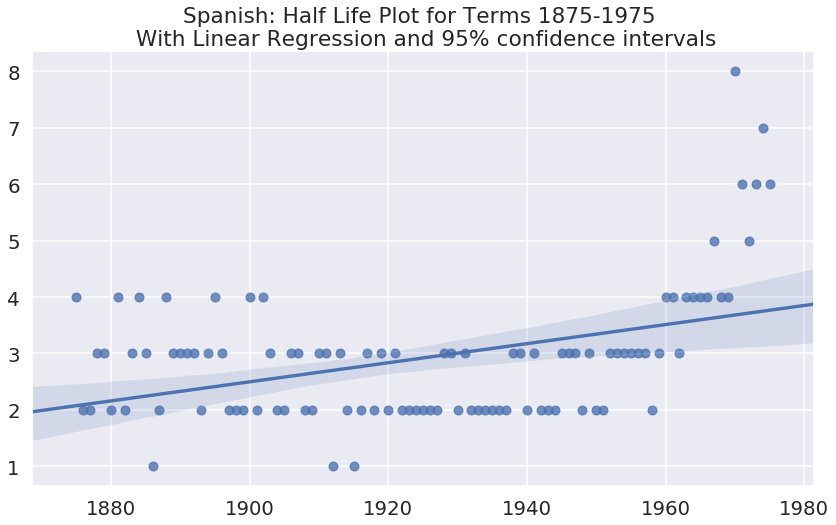

In [285]:
data_to_halflife_plot(lang='spa', lang_prettyname='Spanish')

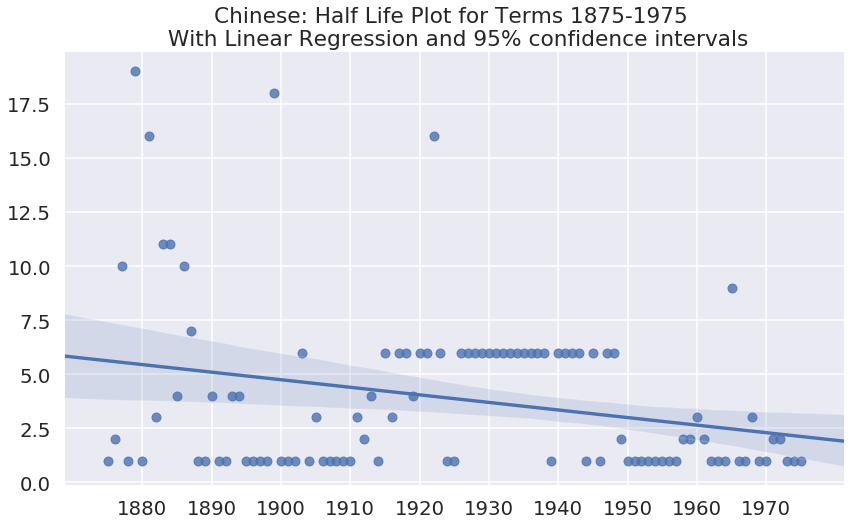

In [369]:
data_to_halflife_plot(lang='chi-sim', lang_prettyname='Chinese')

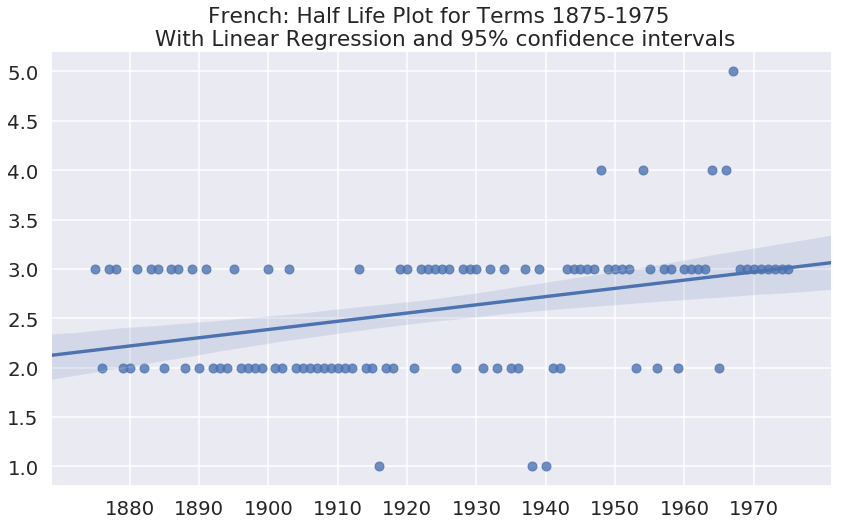

In [368]:
data_to_halflife_plot(lang='fre', lang_prettyname='French')

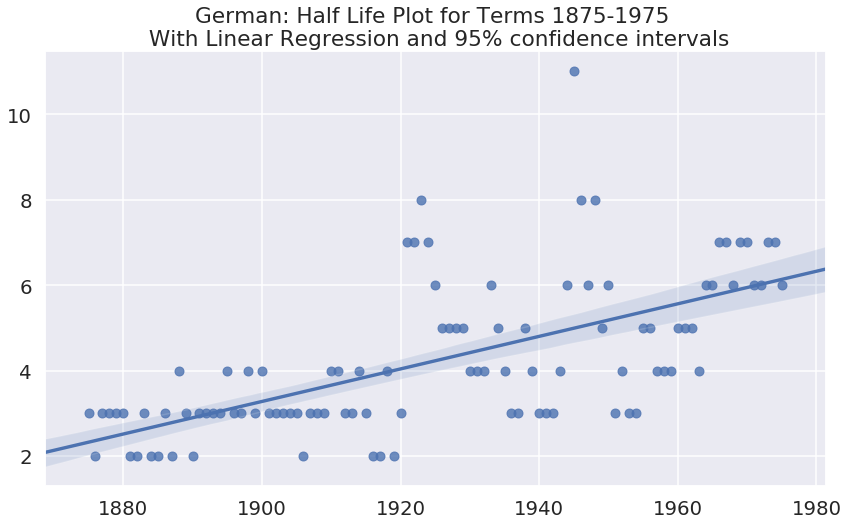

In [288]:
data_to_halflife_plot(lang='ger', lang_prettyname='German')

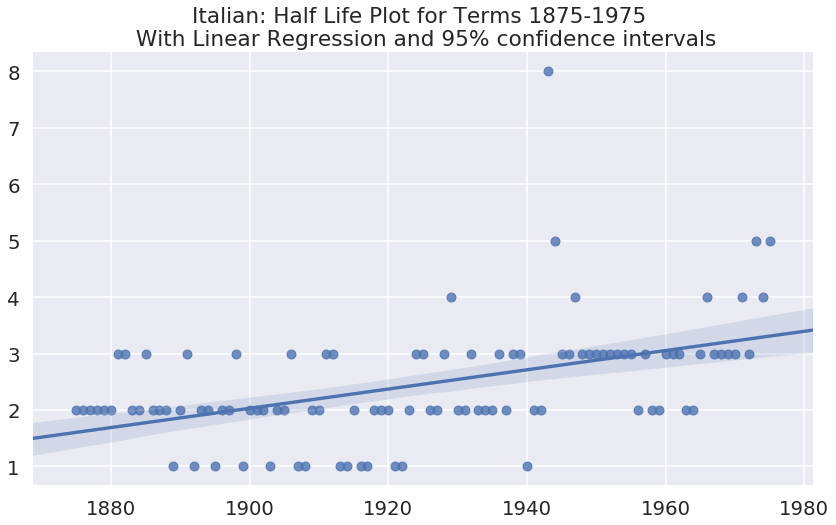

In [290]:
data_to_halflife_plot(lang='ita', lang_prettyname='Italian')

#### The Hebrew Exception
In Hebrew, 1948 actually never fully reached a proper half-life. That is because 1948 is the indpendence year of Israel and is highly important in the Israeli and Hebrew cultures. Around the late 90's you can see a clear increase in the mentions of many years (and probably publications in general) in Israel, so that in fact 1948 *exceeded* its initial peak from 0.0031% at 1951 to 0.0036% at 1992 and than even to 0.0040% at 2007!
You can see that [at Google Books Ngram Viewer online](https://books.google.com/ngrams/graph?content=1948&year_start=1800&year_end=2019&corpus=24&smoothing=3&share=&direct_url=t1%3B%2C1948%3B%2Cc0#t1%3B%2C1948%3B%2Cc0). 
Therefore, the halflife function raises an exception at that case and I will exclude it from the plot.

/Users/tomer/miniconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


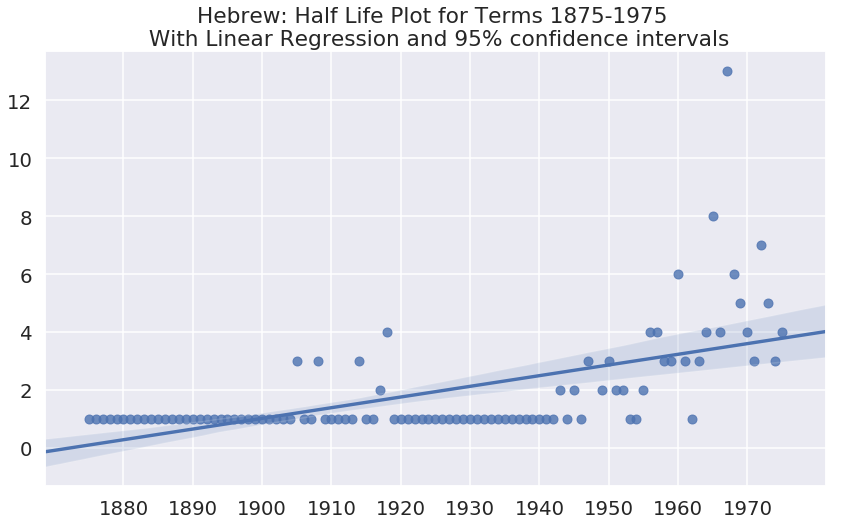

In [367]:
hebrew_terms = list(range(1875,1976))
hebrew_terms.remove(1948)
data_to_halflife_plot(lang='heb', lang_prettyname='Hebrew', terms_list=hebrew_terms)

Below is the frequency plot of "1948" in the hebrew corpus:

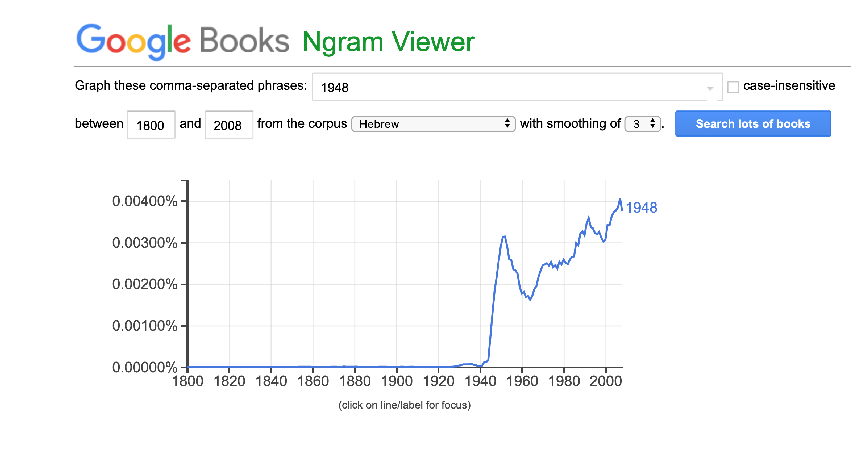

In [356]:
image = mpimg.imread("./viz/ngrams_heb_1948.png")
plt.imshow(image)
plt.axis('off')
plt.show()

As you can see, this year has been so meaningful that it has climbed multiple peaks after the first one and reached two higher peaks than the first one, never declining actually below a half of a peak of max value to create a "half life".

### i. Comparing across all languages, were there any years that were outliers, such as years that were forgotten particularly quickly or particularly slowly? Briefly speculate about possible reasons for that pattern.


The most dominant outlier was the year “1948” for Hebrew, which was such an outlier that it didn’t have a half-life (never reached a half of the peak value) as discussed earlier.
Below is a brief description of each language’s patterns of half-lives:

* Spanish – seemed to be ascending nonlinearly starting 1960, with 1970 being mentioned a most of all. I did not find a good obvious reason for that from a short search, but as the dictator Franco died in 1975 everything changed. Maybe that would lead to later mentions of 1970 as the start of the new era (as the 1970’s). 

* Chinese - had a few outliers with high half lives around: 1879, 1881, 1899, 1922, and 1965.

* French - 1918, 1938 and 1940 were forgotten the quickest, and 1967 was remembered the most. 1967 was the year of huge waves of student and liberal protest, which started a huge liberal movement and cultural shift. This was key in lot of literature. 1938 and 1940 were shameful years in terms of WWII events so that makes sense. 

* German – 1945 is the high outlier, since it is the year World War II has ended and Germany shifted face most clearly. It would also make sense to have more books mentioning that positive revolution rather than the negative Nazi cornerstone revolutions. 

* Italian – 1943 was remembered the most. 

An interesting note is that all of the languages had some sort of an increasing trend if any (though not linear), except Chinese. In Chinese the early high outliers were so strong that the trend seems to decrease. If we remove all the outliers above 10.0 then we may see no trend. However, this might make sense with either change in text popularity, or with increasing censorship by the government. 
In short, in languages which are tightly tied with a country or one culture, there seem to be more pronounced outliers, particularly high outliers about years which have shaped the history of that culture, and low outliers of “shameful” years. 
